In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

In [2]:
maturity_rub = [3,6,9,12,24,36,48,60,72,84,96,108,120,144,180,]
maturity_rub= [i * 4 for i in maturity_rub]


ds_rate_rub = [8.51987757,8.68611319,8.90460383,9.04938647,9.16620517,9.16277249,9.119128,9.06260294,9.01015779,
               8.95942704,8.91830151,8.87442665,8.83969915,8.8362406,8.79850223,]

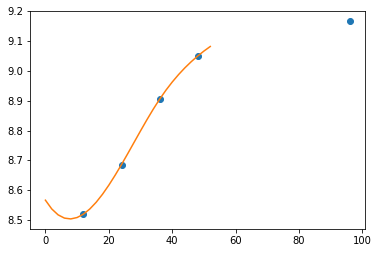

In [3]:
interpolate_rub = CubicSpline(maturity_rub, ds_rate_rub)
interval_rub = np.arange(0, 54, 2)
plt.plot(maturity_rub[:5], ds_rate_rub[:5], 'o')
plt.plot(interval_rub, interpolate_rub(interval_rub))

In [4]:
maturity_usd = [3,6,9,12,15,18,21,24,27,30,33,36,39,48,60,72,84,96,108,120,132,144,180,240,300,360]
maturity_usd= [i * 4 for i in maturity_usd]
ds_rate_usd = [2.84253062,2.80778295,2.7947691,2.78672186,2.78148933,2.76474858,2.74385753,2.72299332,2.70750966,2.69278142,
               2.68063008,2.67150303,2.66686195,2.66005416,2.67045368,2.68499512,2.70525985,2.72994097,2.75619769,2.78172399,
               2.804673,2.82275184,2.857914,2.87560338,2.86786144,2.85316361]


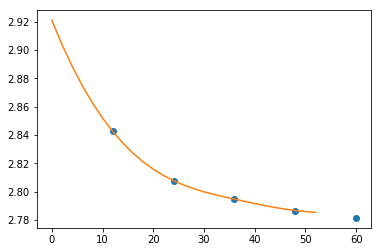

In [5]:
interpolate_usd = CubicSpline(maturity_usd, ds_rate_usd)
interval_usd = np.arange(0, 54, 2)
plt.plot(maturity_usd[:5], ds_rate_usd[:5], 'o')
plt.plot(interval_usd, interpolate_usd(interval_usd))

In [6]:
d = {'maturity_rub': maturity_rub, 'ds_rate_rub': ds_rate_rub}
d1={'maturity_usd': maturity_usd, 'ds_rate_usd': ds_rate_usd}
df_rub = pd.DataFrame(data=d)
df_usd = pd.DataFrame(data=d1)

In [7]:
d2={'maturity_rub_2weeks': interval_rub, 'ds_rate_int_rub': interpolate_rub(interval_rub)}
d3={'maturity_usd_2weeks': interval_usd, 'ds_rate_int_usd': interpolate_usd(interval_usd)}
df_rub_int = pd.DataFrame(data=d2)
df_usd_int = pd.DataFrame(data=d3)


In [8]:
df_rub_usd_int=pd.concat([df_usd_int, df_rub_int], axis=1, sort=False)
df_rub_usd_int=df_rub_usd_int.drop(['maturity_rub_2weeks'], axis=1)
df_rub_usd_int=df_rub_usd_int.rename(columns={"maturity_usd_2weeks":"maturity"})
s=0.0134
df_rub_usd_int['FX']=s*(1+df_rub_usd_int['ds_rate_int_usd'])/(1+df_rub_usd_int['ds_rate_int_rub'])

In [9]:
df_rub_usd_int.head() #значения по интерполированным кривулям с шагом 2 нед и fx

,maturity,ds_rate_int_usd,ds_rate_int_rub,FX
0,0,2.921009,8.566641,0.005492
1,2,2.903959,8.537234,0.005485
2,4,2.888633,8.517464,0.005475
3,6,2.874929,8.506588,0.005462
4,8,2.862745,8.503861,0.005446


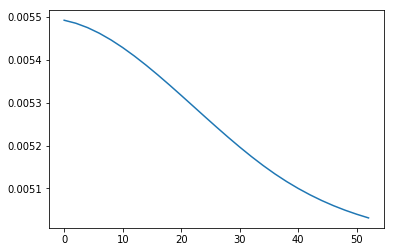

In [10]:
plt.plot(df_rub_usd_int['maturity'], df_rub_usd_int['FX'])

In [11]:
ds_rate_rub_diff=np.diff(interpolate_rub(interval_rub))
ds_rate_usd_diff=np.diff(interpolate_usd(interval_usd))
fx_diff=np.diff(np.log(s*(1+interpolate_usd(interval_usd))/(1+interpolate_rub(interval_rub))))
maturity_diff=np.diff(interval_rub)


df_diff = pd.DataFrame(data={'maturity_diff':maturity_diff,'ds_rate_rub_diff':ds_rate_rub_diff, 
                            'ds_rate_usd_diff':ds_rate_usd_diff, 'fx_diff':fx_diff })
df_diff.head()   #дельты рейтов и дельты логарифма fx

,maturity_diff,ds_rate_rub_diff,ds_rate_usd_diff,fx_diff
0,2,-0.029407,-0.017050,-0.001279
1,2,-0.019770,-0.015326,-0.001858
2,2,-0.010876,-0.013704,-0.002387
3,2,-0.002727,-0.012184,-0.002862
4,2,0.004678,-0.010765,-0.003283


In [157]:
# df_diff
curve_rub = df_diff.loc[:,'ds_rate_rub_diff']#.cumsum()+df_rub_usd_int.loc[0,'ds_rate_int_rub']
curve_us = df_diff.loc[:,'ds_rate_usd_diff']#.cumsum()+df_rub_usd_int.loc[0,'ds_rate_int_usd']
curve_fx = df_diff.loc[:,'fx_diff']#.cumsum()+df_rub_usd_int.loc[0,'ds_rate_int_rub']
# curve_rub
decomposed = pd.read_pickle('./decomposed_cor.pkl')
df_diff

,maturity_diff,ds_rate_rub_diff,ds_rate_usd_diff,fx_diff
0,2,-0.029407,-0.017050,-0.001279
1,2,-0.019770,-0.015326,-0.001858
2,2,-0.010876,-0.013704,-0.002387
3,2,-0.002727,-0.012184,-0.002862
4,2,0.004678,-0.010765,-0.003283
5,2,0.011339,-0.009449,-0.003648
6,2,0.017255,-0.008234,-0.003956
7,2,0.022428,-0.007121,-0.004208
8,2,0.026856,-0.006110,-0.004403
9,2,0.030540,-0.005201,-0.004543


In [191]:

def simulate_hull_white(
    curve_rub, 
    curve_us, 
    curve_fx,
    decomp,#decomposed matrix of covariation
    init, #init values for rub rate, usd rate, fx rate
    rub_alpha=1,
    usd_alpha=1,

    ):
    sigma=[0.03, 0.0093, 0.11]

    k_fx=0.015
#     rub_alpha=1
#     usd_alpha=1
#     sigma=1

    dt=14/365
    
    sim_number = 500
    timesteps = 27
    results = np.zeros(shape=(timesteps, 3, sim_number))


    for sim_ix in range(sim_number):
        results[0,:,sim_ix] = init

        stoch_generator = np.dot(np.random.normal(size=(timesteps,3)),decomp.values,)*sigma
        
        for i, (rate_rub, rate_usd, rate_fx, stoch_tuple) in enumerate(zip(curve_rub,curve_us,curve_fx, stoch_generator)):
            results[i+1,0,sim_ix] = results[i,0,sim_ix] + (rate_rub - rub_alpha*results[i,0,sim_ix])*dt+stoch_tuple[0]
            results[i+1,1,sim_ix] = results[i,1,sim_ix] + (rate_usd - usd_alpha*results[i,1,sim_ix])*dt+stoch_tuple[1]
            results[i+1,2,sim_ix] = results[i,2,sim_ix] + k_fx*(rate_fx - np.log(results[i,2,sim_ix]))*dt+stoch_tuple[2]

    return results

# r = simulate_hull_white(
#     curve_rub, 
#     curve_us, 
#     decomp=decomposed,
#     init=df_rub_usd_int.loc[0,['ds_rate_int_rub','ds_rate_int_usd','FX']].values,
# )

# plt.plot(r[:,1,:])
# plt.show()

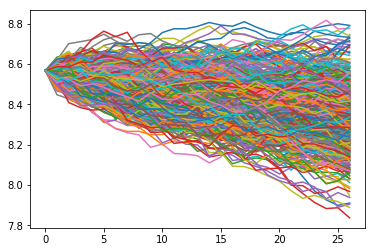

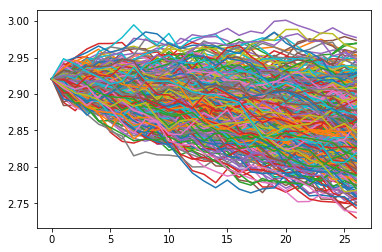

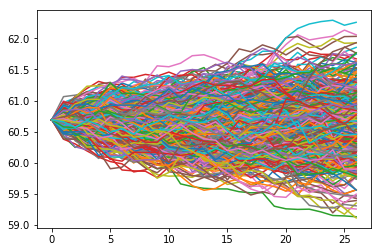

In [192]:
# for rub_alpha in [0,0.03,0.5,1]:
# for usd_alpha in [0,0.03,0.5,1]:
# for sigma in [0,0.03,0.5,1]:
rub_alpha=0.03
usd_alpha=0.02
result = simulate_hull_white(
    curve_rub, 
    curve_us,
    curve_fx,
    decomp=decomposed,
    init=df_rub_usd_int.loc[0,['ds_rate_int_rub','ds_rate_int_usd','bad_fx']].values,
    rub_alpha=rub_alpha,
    usd_alpha=usd_alpha,)

for i in range(3):
    plt.plot(result[:,i,:])
    plt.show()
    plt.clf()
    plt.cla()
    plt.close()

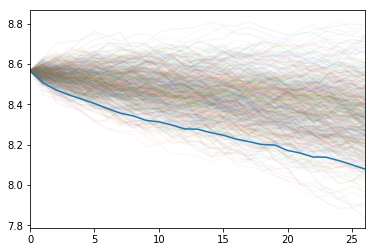

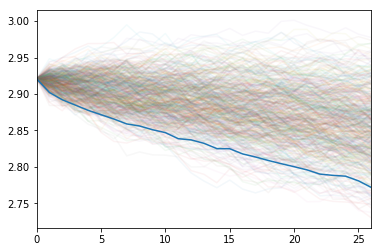

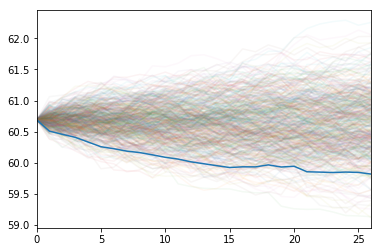

In [204]:

plt.plot(pd.DataFrame(result[:,0,:]), alpha=0.05)
pd.DataFrame(result[:,0,:].T).quantile(0.05).plot()
plt.show()
plt.clf()
plt.cla()
plt.close()



plt.plot(pd.DataFrame(result[:,1,:]), alpha=0.05)
pd.DataFrame(result[:,1,:].T).quantile(0.05).plot()
plt.show()
plt.clf()
plt.cla()
plt.close()



plt.plot(pd.DataFrame(result[:,2,:]), alpha=0.05)
pd.DataFrame(result[:,2,:].T).quantile(0.05).plot()
plt.show()
plt.clf()
plt.cla()
plt.close()



# pd.DataFrame(result[:,0,:].T).

In [113]:

df_rub_usd_int.loc[0,['ds_rate_int_rub','ds_rate_int_usd','FX']].values

array([8.56664111e+00, 2.92100882e+00, 5.49215943e-03])

In [147]:
# curve_fx
curve_fx=df_rub_usd_int['bad_fx'].diff().dropna().reset_index(drop=True)

array([4572, 9350, 2825, 1559,   97, 8244, 8436, 4254, 4174, 3791, 1508,
       8066,  836, 5257,  476, 6978, 5001, 6759, 6689, 4713, 3587, 5314,
       9073, 5809, 4012, 5867, 5775, 9104, 8334, 2651, 9625, 4258, 5654,
         18, 9360, 3397, 3105, 9335,  607, 8455, 4645, 1190, 3315, 1113,
       3436, 1969, 5981, 8585, 5677, 9688])